## Analysing Middle Overs Batting of Teams in IPL 2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
middle_overs_batting = pd.read_csv("project_ipl_2022_middle_overs_batting.csv")

In [3]:
middle_overs_batting.head()

,Team,Team_shortform,M,I,R,B,Outs,Avg,SR,HS,4s,6s,BPW,BPB,Boundary %
0,Rajasthan Royals,RR,17,17,"1,168",918,36,32.44,127.23,111,94,46,25.5,6.56,15.3%
1,Royal Challengers Bangalore,RCB,16,16,"1,097",864,38,28.87,126.97,101,80,42,22.7,7.08,14.1%
2,Gujarat Titans,GT,16,16,"1,076",864,30,35.87,124.54,88,88,28,28.8,7.45,13.4%
3,Lucknow Super Giants,LSG,15,15,"1,073",803,31,34.61,133.62,93,71,45,25.9,6.92,14.4%
4,Kolkata Knight Riders,KKR,14,14,"1,031",750,47,21.94,137.47,110,69,60,16.0,5.81,17.2%


In [4]:
colors = []
# Iterate over rows of middle_overs_batting
for idx, row in middle_overs_batting.iterrows():
    if row['Team_shortform'] == "CSK" :
        colors.append('yellow')
    elif row['Team_shortform'] == "RCB" :
        colors.append('green')
    elif row['Team_shortform'] == "RR" :
        colors.append('deeppink')
    elif row["Team_shortform"] == "DC":
        colors.append('royalblue')
    elif row["Team_shortform"] == "GT":
        colors.append("mediumpurple")
    elif row["Team_shortform"] == 'PBKS':
        colors.append('red')
    elif row["Team_shortform"] == "KKR":
        colors.append('purple')
    elif row["Team_shortform"] == "LSG":
        colors.append('skyblue')
    elif row["Team_shortform"] == "SRH":
        colors.append("orange")
    elif row["Team_shortform"] == "MI":
        colors.append('blue')
    else:
        colors.append('grey')
print(colors)

['deeppink', 'green', 'mediumpurple', 'skyblue', 'purple', 'orange', 'yellow', 'red', 'blue', 'royalblue', 'grey']


## Finding Which team has more Avearge Runs Per Wicket in IPL 2022 Middle Overs (7-15 Overs)

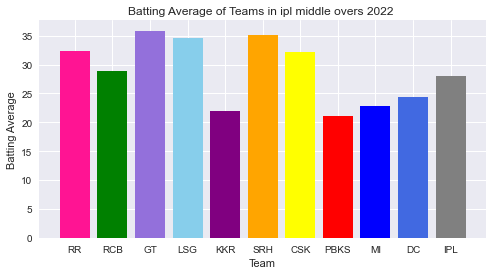

In [5]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = middle_overs_batting["Team_shortform"]
y = middle_overs_batting["Avg"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Batting Average of Teams in ipl middle overs 2022 ")
plt.xlabel("Team")
plt.ylabel("Batting Average")
plt.show()

From the above bar graph we can see that GT,LSG,SRH,RR,CSK has above 30 runs per wicket in middle overs and KKR and PBKS are
losing there wicket for just 22 runs and MI,DC are also not performing well whereas RCB is doing in middle overs just avg
runs per wicket in ipl.

## Finding Which team has batted Aggersively(Highest Strike Rate) in IPL 2022 Middle Overs (7-15 Overs)

strike rate = runs for 100 balls

Run Per Ball = Runs/balls

Strike Rate = Runs per ball * 100

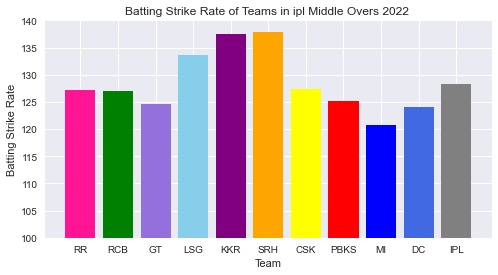

In [6]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = middle_overs_batting["Team_shortform"]
y = middle_overs_batting["SR"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Batting Strike Rate of Teams in ipl Middle Overs 2022 ")
plt.xlabel("Team")
plt.ylabel("Batting Strike Rate")
plt.ylim(100,140)
plt.show()

From above we can see that KKR,SRH,LSG are really batting aggersively in middle overs with strike rate nearly 135 whereas MI is not playing aggersively in middle overs with strike rate of 122

## Finding Which team has taking less balls to hit a boundary in IPL 2022 Middle Overs phase(7-15 Overs)

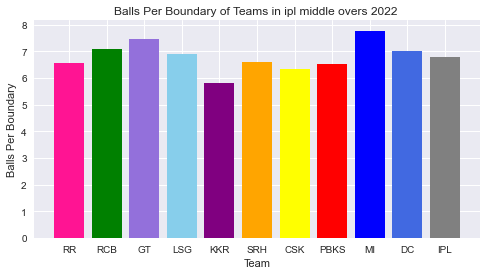

In [7]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(8,4))
x = middle_overs_batting["Team_shortform"]
y = middle_overs_batting["BPB"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Balls Per Boundary of Teams in ipl middle overs 2022 ")
plt.xlabel("Team")
plt.ylabel("Balls Per Boundary")
plt.show()

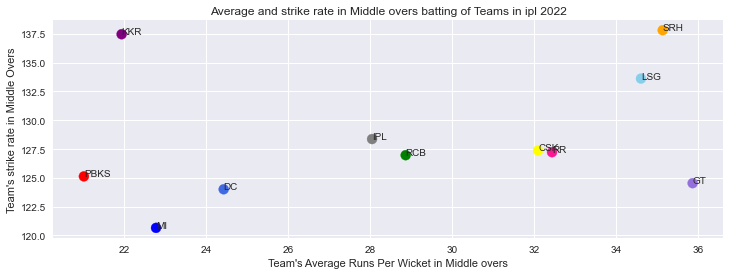

In [8]:
# create scatter plot for Teams Average and strikerate in middle overs batting
plt.style.use("seaborn")
fig = plt.figure(figsize=(12,4))
x = middle_overs_batting["Avg"]
y = middle_overs_batting["SR"]
plt.scatter(x,y,c=colors,s=100)
plt.title("Average and strike rate in Middle overs batting of Teams in ipl 2022")
plt.xlabel("Team's Average Runs Per Wicket in Middle overs")
plt.ylabel("Team's strike rate in Middle Overs")
for i, label in enumerate(middle_overs_batting['Team_shortform']):
    plt.annotate(label,(x[i], y[i]))
plt.show()

 From above graph we can see that KKR is losing wickets in middle overs but there strike rate is really good whereas GT is  exactly opposite giving more important to there wicket but strike rate is less.

## K-Means Clustering on Teams Batting in Middle Overs

In [9]:
X = middle_overs_batting.iloc[:, [7,8]].values

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


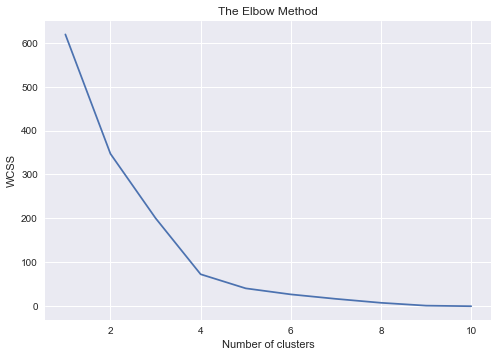

In [10]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

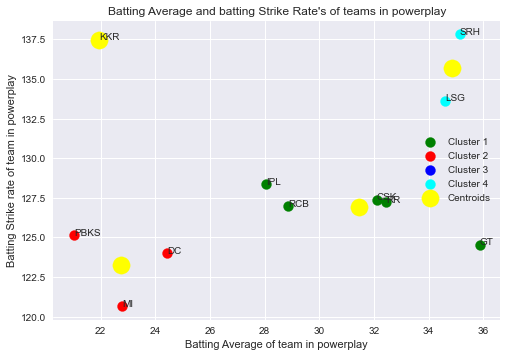

In [12]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title("Batting Average and batting Strike Rate's of teams in powerplay")
plt.xlabel("Batting Average of team in powerplay")
plt.ylabel('Batting Strike rate of team in powerplay')
for i, label in enumerate(middle_overs_batting['Team_shortform']):
    plt.annotate(label,(x[i], y[i]))
plt.legend()
plt.show()

In [13]:
kmeans.labels_ 

array([0, 0, 0, 3, 2, 3, 0, 1, 1, 1, 0])

In [14]:
middle_overs_batting['Cluster_on_avg_str'] = kmeans.labels_

In [15]:
cluster_4_teams = middle_overs_batting[middle_overs_batting['Cluster_on_avg_str'] == 3]

In [16]:
cluster_4_teams.head()

,Team,Team_shortform,M,I,R,B,Outs,Avg,SR,HS,4s,6s,BPW,BPB,Boundary %,Cluster_on_avg_str
3,Lucknow Super Giants,LSG,15,15,"1,073",803,31,34.61,133.62,93,71,45,25.9,6.92,14.4%,3
5,Sunrisers Hyderabad,SRH,14,14,984,714,28,35.14,137.82,99,56,52,25.5,6.61,15.1%,3


In [17]:
cluster_3_teams = middle_overs_batting[middle_overs_batting['Cluster_on_avg_str'] == 2]

In [18]:
cluster_3_teams.head()

,Team,Team_shortform,M,I,R,B,Outs,Avg,SR,HS,4s,6s,BPW,BPB,Boundary %,Cluster_on_avg_str
4,Kolkata Knight Riders,KKR,14,14,"1,031",750,47,21.94,137.47,110,69,60,16.0,5.81,17.2%,2


In [19]:
cluster_1_teams = middle_overs_batting[middle_overs_batting['Cluster_on_avg_str'] == 0]

In [20]:
cluster_1_teams.head()

,Team,Team_shortform,M,I,R,B,Outs,Avg,SR,HS,4s,6s,BPW,BPB,Boundary %,Cluster_on_avg_str
0,Rajasthan Royals,RR,17,17,"1,168",918,36,32.44,127.23,111,94,46,25.5,6.56,15.3%,0
1,Royal Challengers Bangalore,RCB,16,16,"1,097",864,38,28.87,126.97,101,80,42,22.7,7.08,14.1%,0
2,Gujarat Titans,GT,16,16,"1,076",864,30,35.87,124.54,88,88,28,28.8,7.45,13.4%,0
6,Chennai Super Kings,CSK,14,14,963,756,30,32.10,127.38,113,77,42,25.2,6.35,15.7%,0
10,IPL,IPL,72,72,"10,153",7909,362,28.05,128.37,111,730,437,21.8,6.78,14.8%,0


In [21]:
cluster_2_teams = middle_overs_batting[middle_overs_batting['Cluster_on_avg_str'] == 1]

In [22]:
cluster_2_teams.head()

,Team,Team_shortform,M,I,R,B,Outs,Avg,SR,HS,4s,6s,BPW,BPB,Boundary %,Cluster_on_avg_str
7,Punjab Kings,PBKS,14,14,946,756,45,21.02,125.13,109,72,44,16.8,6.52,15.3%,1
8,Mumbai Indians,MI,14,14,911,755,40,22.78,120.66,104,57,40,18.9,7.78,12.8%,1
9,Delhi Capitals,DC,14,14,904,729,37,24.43,124.01,94,66,38,19.7,7.01,14.3%,1


These teams are not doing well in middle overs we have see the who are causing the problem

## Clustering Of Players in IPL Middle Overs Batting 2022

By Seeing Players Performance in particular phases helps us that by which players that team has performed well/worst 
in that particular phase and if he is not form we can release him before auction or if is in form we can tell player 
he is doing something wrong in that particular phase which costing the team so that he can improve that and perform well 
next year

In [23]:
middle_overs_batters = pd.read_csv("project_ipl_2022_middle_overs_players_batting.csv")

In [24]:
middle_overs_batters.head()

,Player,Team_shortform,I,R,B,Outs,Avg,SR,score,HS,...,50,100,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches,Total Normalization Score
0,A Badoni,LSG,6,59,58,3,19.67,101.72,27.45,27,...,0,0,19.33,9.67,0.06,0.32,0.08,0.63,0.17,27.45
1,Abhishek Sharma,SRH,8,167,109,6,27.83,153.21,50.85,44,...,0,0,18.17,6.06,0.14,0.80,0.06,0.86,0.33,50.85
2,AD Russell,KKR,12,214,122,6,35.67,175.41,64.35,70,...,1,0,20.33,3.81,0.21,1.00,0.09,1.00,0.67,64.35
3,AK Markram,SRH,10,246,189,6,41.00,130.16,48.00,41,...,0,0,31.50,7.27,0.26,0.58,0.22,0.78,0.50,48.00
4,AT Rayudu,CSK,9,198,153,7,28.29,129.41,45.20,53,...,1,0,21.86,5.46,0.14,0.58,0.11,0.89,0.42,45.20


In [25]:
colors = []
# Iterate over rows of powerplay_batters
for idx, row in middle_overs_batters.iterrows():
    if row['Team_shortform'] == "CSK" :
        colors.append('yellow')
    elif row['Team_shortform'] == "RCB" :
        colors.append('green')
    elif row['Team_shortform'] == "RR" :
        colors.append('deeppink')
    elif row["Team_shortform"] == "DC":
        colors.append('blue')
    elif row["Team_shortform"] == "GT":
        colors.append("mediumpurple")
    elif row["Team_shortform"] == 'PBKS':
        colors.append('red')
    elif row["Team_shortform"] == "KKR":
        colors.append('purple')
    elif row["Team_shortform"] == "LSG":
        colors.append('skyblue')
    elif row["Team_shortform"] == "SRH":
        colors.append("orange")
    elif row["Team_shortform"] == "MI":
        colors.append('blue')
    else:
        colors.append('grey')
print(colors)

['skyblue', 'orange', 'purple', 'orange', 'yellow', 'mediumpurple', 'blue', 'deeppink', 'mediumpurple', 'blue', 'skyblue', 'yellow', 'green', 'green', 'mediumpurple', 'blue', 'deeppink', 'red', 'red', 'blue', 'green', 'skyblue', 'skyblue', 'orange', 'blue', 'red', 'red', 'yellow', 'blue', 'yellow', 'orange', 'purple', 'blue', 'red', 'skyblue', 'deeppink', 'blue', 'orange', 'yellow', 'green', 'blue', 'red', 'yellow', 'blue', 'green', 'mediumpurple', 'deeppink', 'purple', 'deeppink', 'purple', 'green', 'mediumpurple', 'deeppink']


## Player's Average Runs per wicket in Middle Overs Batting in IPL 2022(with min 50 balls faced)

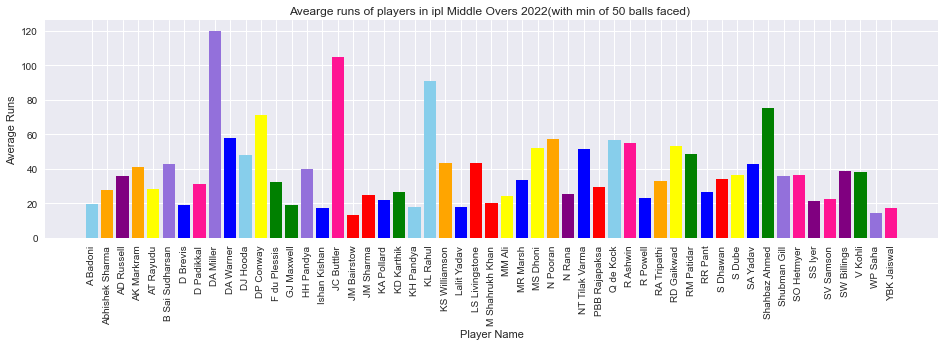

In [26]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(16,4))
x = middle_overs_batters["Player"]
y = middle_overs_batters["Avg"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Avearge runs of players in ipl Middle Overs 2022(with min of 50 balls faced) ")
plt.xlabel("Player Name")
plt.ylabel("Average Runs")
plt.xticks(rotation=90)
plt.show()

## Player's Strike Rate in Middle overs Batting in ipl 2022 (with min 50 balls faced)

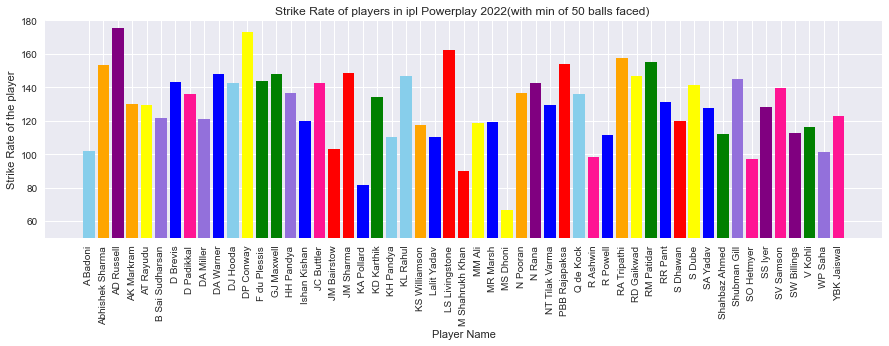

In [27]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(15,4))
x = middle_overs_batters["Player"]
y = middle_overs_batters["SR"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Strike Rate of players in ipl Powerplay 2022(with min of 50 balls faced) ")
plt.xlabel("Player Name",)
plt.ylabel("Strike Rate of the player")
plt.xticks(rotation=90)
plt.ylim(50,180)
plt.show()

## Player's Balls Per Boundary in ipl powerplay batting 2022 (with min 50 balls faced)

Boundaries are really important in Powerplay to win the matches and to score fastly using filed restrictions for teams 
batting

Balls Per Boundary = How many balls will the batter will take to hit a boundary 

Lesser the value more is the boundary % of the player

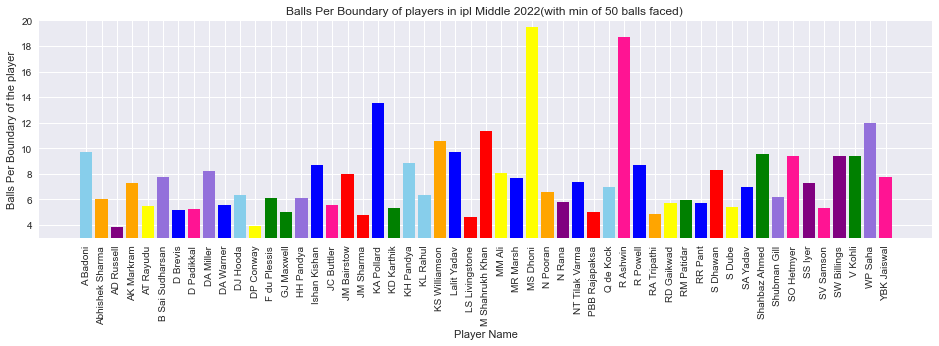

In [28]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(16,4))
x = middle_overs_batters["Player"]
y = middle_overs_batters["BPB"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Balls Per Boundary of players in ipl Middle 2022(with min of 50 balls faced) ")
plt.xlabel("Player Name")
plt.ylabel("Balls Per Boundary of the player")
plt.xticks(rotation=90)
plt.ylim(3,20)
plt.show()

## Players Average And Strike Rate in Power play Batting in ipl 2022( with 50 balls faced)

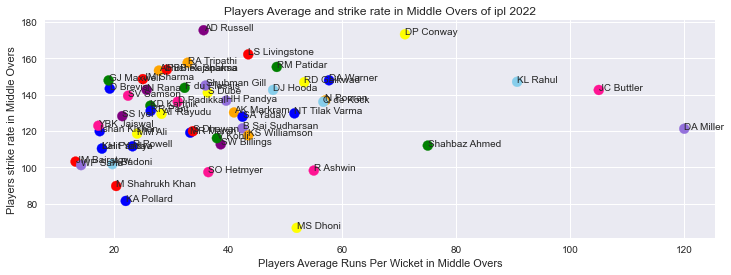

In [29]:
# create scatter plot for Players Average and strikerate in middle overs batting
plt.style.use("seaborn")
fig = plt.figure(figsize=(12,4))
x = middle_overs_batters["Avg"]
y = middle_overs_batters["SR"]
plt.scatter(x,y,c=colors,s=100)
plt.title("Players Average and strike rate in Middle Overs of ipl 2022")
plt.xlabel("Players Average Runs Per Wicket in Middle Overs")
plt.ylabel("Players strike rate in Middle Overs")
for i, label in enumerate(middle_overs_batters['Player']):
    plt.annotate(label,(x[i], y[i]))
plt.show()

## Clustering The players in Middle Overs batting IPL 2022 (with min 50 balls faced )

## K-Means Clustering on Players Batting in middle overs in IPL 2022

In [50]:
X = middle_overs_batters.iloc[:, [6,7]].values

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


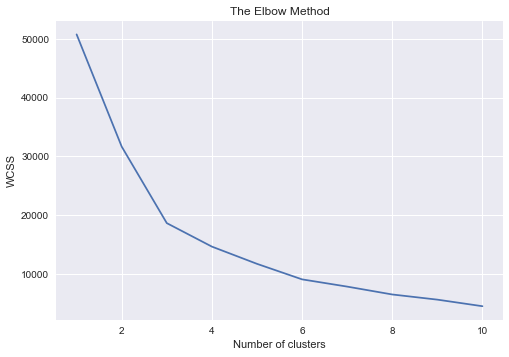

In [51]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [52]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

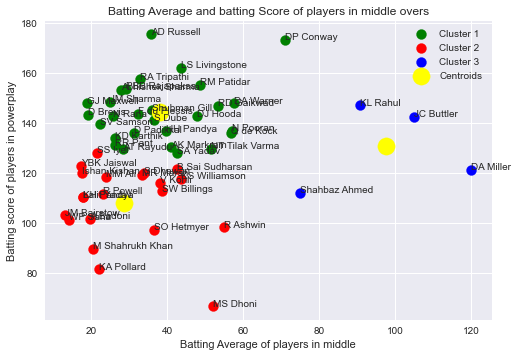

In [53]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title("Batting Average and batting Score of players in middle overs")
plt.xlabel("Batting Average of players in middle")
plt.ylabel('Batting score of players in powerplay')
for i, label in enumerate(middle_overs_batters['Player']):
    plt.annotate(label,(x[i], y[i]))
plt.legend()
plt.show()

Cluster 1 (Green Color) = These Players has performed really good in middle overs batting with high str (which is required) 
and good avg

Cluster 2 (blue Color) = These Players has performed well but with moderate str (which is ok) and with high avg

Cluster 3 (Red Color) = These Players has not performed with both str and avg is less ( Which will cost the team) 

In [34]:
kmeans.labels_ 

array([1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       2, 0, 1, 1, 0, 1, 1, 1, 1])

In [35]:
middle_overs_batters['Cluster_on_avg_str'] = kmeans.labels_

In [36]:
# These Players have performed well in powerplay batting this year with high score and high str
cluster_1_players = middle_overs_batters[middle_overs_batters['Cluster_on_avg_str'] == 0]

In [37]:
cluster_1_players.head(30)

,Player,Team_shortform,I,R,B,Outs,Avg,SR,score,HS,...,100,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches,Total Normalization Score,Cluster_on_avg_str
1,Abhishek Sharma,SRH,8,167,109,6,27.83,153.21,50.85,44,...,0,18.17,6.06,0.14,0.80,0.06,0.86,0.33,50.85,0
2,AD Russell,KKR,12,214,122,6,35.67,175.41,64.35,70,...,0,20.33,3.81,0.21,1.00,0.09,1.00,0.67,64.35,0
3,AK Markram,SRH,10,246,189,6,41.00,130.16,48.00,41,...,0,31.50,7.27,0.26,0.58,0.22,0.78,0.50,48.00,0
4,AT Rayudu,CSK,9,198,153,7,28.29,129.41,45.20,53,...,0,21.86,5.46,0.14,0.58,0.11,0.89,0.42,45.20,0
6,D Brevis,MI,5,96,67,5,19.20,143.28,44.50,41,...,0,13.40,5.15,0.06,0.70,0.01,0.91,0.08,44.50,0
7,D Padikkal,RR,12,249,183,8,31.12,136.07,49.75,41,...,0,22.88,5.23,0.17,0.64,0.12,0.91,0.67,49.75,0
9,DA Warner,DC,7,173,117,3,57.67,147.86,59.70,42,...,0,39.00,5.57,0.42,0.75,0.30,0.89,0.25,59.70,0
10,DJ Hooda,LSG,13,335,235,7,47.86,142.55,56.25,50,...,0,33.57,6.35,0.32,0.70,0.24,0.84,0.75,56.25,0
11,DP Conway,CSK,4,142,82,2,71.00,173.17,71.50,56,...,0,41.00,3.90,0.54,0.98,0.33,0.99,0.00,71.50,0
12,F du Plessis,RCB,9,194,135,6,32.33,143.70,49.75,58,...,0,22.50,6.14,0.18,0.71,0.11,0.85,0.42,49.75,0


In [38]:
# These Players have not performed well in middle overs batting this year with very less str and with less avg
cluster_2_players= middle_overs_batters[middle_overs_batters['Cluster_on_avg_str'] == 1]

In [39]:
cluster_2_players.head(30)

,Player,Team_shortform,I,R,B,Outs,Avg,SR,score,HS,...,100,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches,Total Normalization Score,Cluster_on_avg_str
0,A Badoni,LSG,6,59,58,3,19.67,101.72,27.45,27,...,0,19.33,9.67,0.06,0.32,0.08,0.63,0.17,27.45,1
5,B Sai Sudharsan,GT,4,85,70,2,42.50,121.43,43.10,35,...,0,35.00,7.78,0.27,0.50,0.26,0.75,0.00,43.10,1
15,Ishan Kishan,MI,10,157,131,9,17.44,119.85,34.65,29,...,0,14.56,8.73,0.04,0.49,0.02,0.69,0.50,34.65,1
17,JM Bairstow,PBKS,6,66,64,5,13.20,103.12,27.35,25,...,0,12.80,8.00,0.00,0.34,0.00,0.73,0.17,27.35,1
19,KA Pollard,MI,9,44,54,2,22.00,81.48,19.40,12,...,0,27.00,13.50,0.08,0.14,0.16,0.38,0.42,19.40,1
21,KH Pandya,LSG,7,107,97,6,17.83,110.31,30.45,33,...,0,16.17,8.82,0.04,0.40,0.04,0.68,0.25,30.45,1
23,KS Williamson,SRH,4,87,74,2,43.50,117.57,39.05,29,...,0,37.00,10.57,0.28,0.47,0.28,0.57,0.00,39.05,1
24,Lalit Yadav,DC,8,107,97,6,17.83,110.31,29.65,28,...,0,16.17,9.70,0.04,0.40,0.04,0.62,0.33,29.65,1
26,M Shahrukh Khan,PBKS,7,61,68,3,20.33,89.71,22.60,24,...,0,22.67,11.33,0.07,0.21,0.11,0.52,0.25,22.60,1
27,MM Ali,CSK,6,96,81,4,24.00,118.52,36.05,39,...,0,20.25,8.10,0.10,0.48,0.09,0.73,0.17,36.05,1


In [40]:
# These Players have performed ok in middle overs batting this year with very less str and but with high avg
cluster_3_players= middle_overs_batters[middle_overs_batters['Cluster_on_avg_str'] == 2]

In [41]:
cluster_3_players.head(30)

,Player,Team_shortform,I,R,B,Outs,Avg,SR,score,HS,...,100,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches,Total Normalization Score,Cluster_on_avg_str
8,DA Miller,GT,13,240,198,2,120.00,121.21,75.65,58,...,0,99.00,8.25,1.00,0.50,1.00,0.72,0.75,75.65,2
16,JC Buttler,RR,10,315,221,3,105.00,142.53,76.20,73,...,0,73.67,5.53,0.86,0.70,0.71,0.89,0.50,76.20,2
22,KL Rahul,LSG,9,272,185,3,90.67,147.03,70.80,51,...,0,61.67,6.38,0.73,0.74,0.57,0.84,0.42,70.80,2
44,Shahbaz Ahmed,RCB,8,150,134,2,75.00,111.94,53.15,41,...,0,67.00,9.57,0.58,0.42,0.63,0.63,0.33,53.15,2


## Players in middle overs in all T20 Format( From last 1 year) 

In [69]:
players = pd.read_csv("project_other_middle_overs_players_batting.csv")

In [70]:
players.head()

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,50,100,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches,Total Score
0,KL Rahul,39,1038,745,15,69.20,139.33,60,60,47,2,0,49.667,6.963,1.000,0.725,0.695,0.810,0.301,70.364
1,RR Rossouw,66,1619,1097,36,44.97,147.58,82,144,61,4,0,30.472,5.351,0.561,0.835,0.358,0.941,0.671,69.176
2,Shoaib Malik,90,1732,1401,34,50.94,123.63,53,118,59,4,0,41.206,7.915,0.669,0.516,0.546,0.733,1.000,68.072
3,DP Conway,31,912,644,15,60.80,141.61,65,99,18,5,0,42.933,5.504,0.848,0.756,0.577,0.929,0.192,66.039
4,KA Pollard,86,980,748,24,40.83,131.02,62,55,68,3,0,31.167,6.081,0.486,0.615,0.370,0.882,0.945,65.846


## Players Average Runs Per Wicket in Middle Overs From last 3 year in all T20 Formats (with min of 500 balls faced)

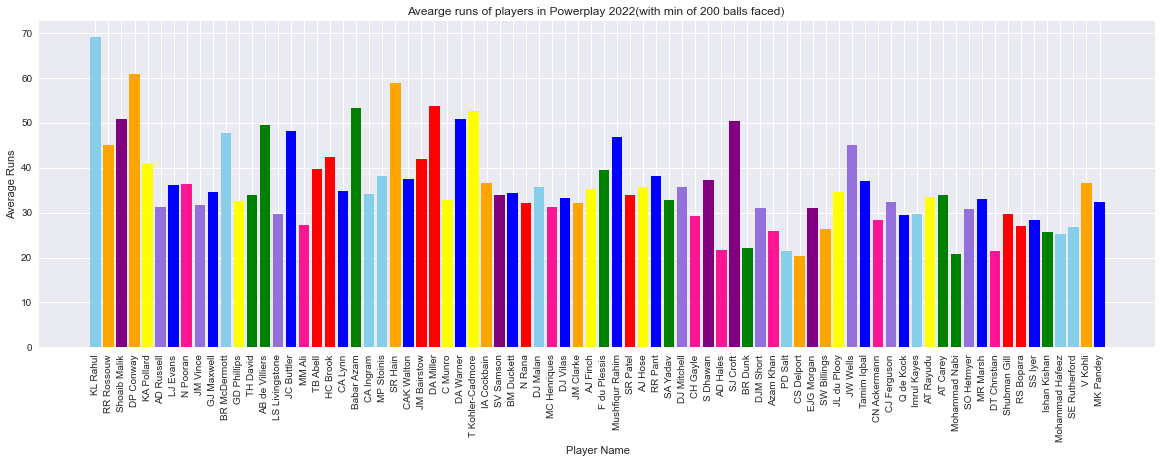

In [72]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(20,6))
x = players["Player"]
y = players["Avg"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Avearge runs of players in Powerplay 2022(with min of 200 balls faced) ")
plt.xlabel("Player Name",)
plt.ylabel("Average Runs")
plt.xticks(rotation=90)
plt.show()

## Player's Strike Rate in middle overs Batting in from past 3 year (with min 500 balls faced)

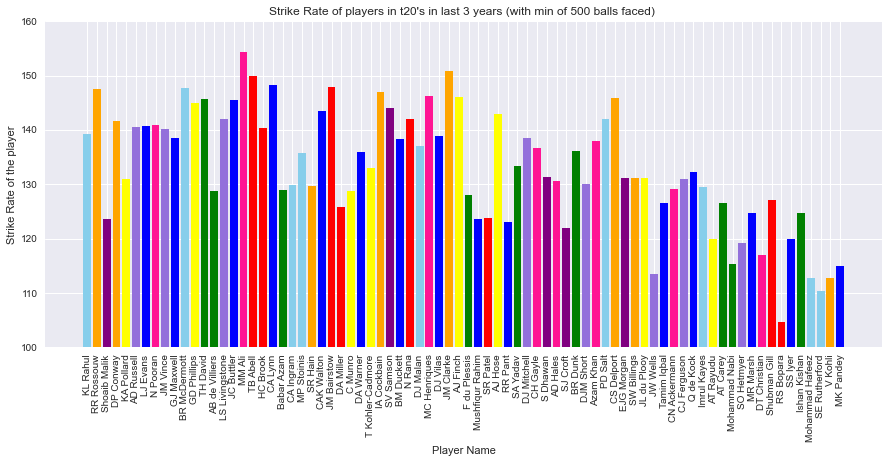

In [76]:
# creating bar plot
plt.style.use("seaborn")
fig = plt.figure(figsize=(15,6))
x = players["Player"]
y = players["SR"]
plt.bar(x,y,color=colors,width = 0.8)
plt.title("Strike Rate of players in t20's in last 3 years (with min of 500 balls faced) ")
plt.xlabel("Player Name",)
plt.ylabel("Strike Rate of the player")
plt.xticks(rotation=90)
plt.ylim(100,160)
plt.show()

## Players Average And Strike Rate in Middle Overs Batting in all T20's( with min 500 balls faced in powerplay)

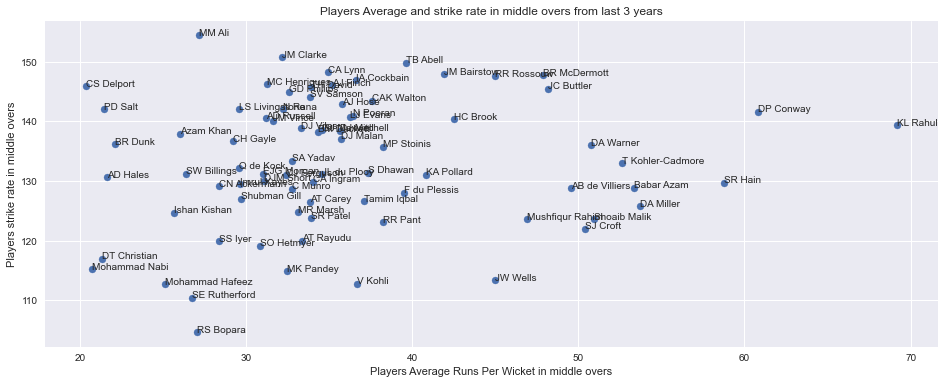

In [79]:
# create scatter plot for Players Average and strikerate in middle overs batting
plt.style.use("seaborn")
fig = plt.figure(figsize=(16,6))
x = players["Avg"]
y = players["SR"]
plt.scatter(x,y)
plt.title("Players Average and strike rate in middle overs from last 3 years")
plt.xlabel("Players Average Runs Per Wicket in middle overs")
plt.ylabel("Players strike rate in middle overs")
for i, label in enumerate(players['Player']):
    plt.annotate(label,(x[i], y[i]))
plt.show()

In [80]:
X = players.iloc[:, [19,6]].values

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


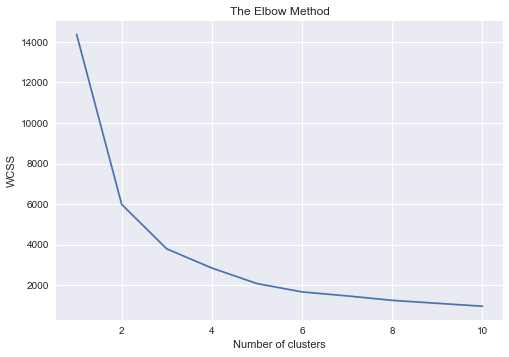

In [81]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [82]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

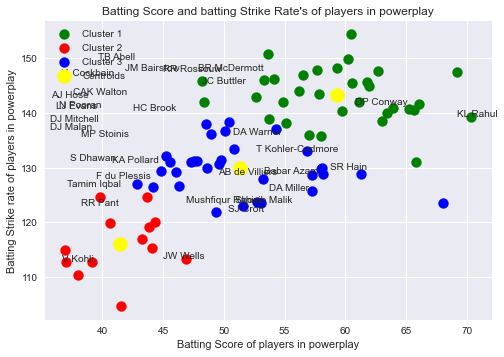

In [83]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'green', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'blue', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'red', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title("Batting Score and batting Strike Rate's of players in powerplay")
plt.xlabel("Batting Score of players in powerplay")
plt.ylabel('Batting Strike rate of players in powerplay')
for i, label in enumerate(players['Player']):
    plt.annotate(label,(x[i], y[i]))
plt.legend()
plt.show()

Cluster 1 (Green Color) = These Players has performed really good in powerplay batting with high str (which is required) 
and good 

Cluster 2 (blue Color) = These Players has performed well but with moderate str (which is ok) and with high avg

Cluster 3 (Red Color) = These Players has not performed with both str and avg is less ( Which will cost the team) 

In [85]:
kmeans.labels_ 

array([0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1])

In [86]:
players['Cluster_on_avg_str'] = kmeans.labels_

In [87]:
# These Players have performed well in powerplay batting this year with high score and high str
cluster_1_teams = players[players['Cluster_on_avg_str'] == 0]

In [90]:
cluster_1_teams.head(35)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,...,100,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches,Total Score,Cluster_on_avg_str
0,KL Rahul,39,1038,745,15,69.20,139.33,60,60,47,...,0,49.667,6.963,1.000,0.725,0.695,0.810,0.301,70.364,0
1,RR Rossouw,66,1619,1097,36,44.97,147.58,82,144,61,...,0,30.472,5.351,0.561,0.835,0.358,0.941,0.671,69.176,0
3,DP Conway,31,912,644,15,60.80,141.61,65,99,18,...,0,42.933,5.504,0.848,0.756,0.577,0.929,0.192,66.039,0
4,KA Pollard,86,980,748,24,40.83,131.02,62,55,68,...,0,31.167,6.081,0.486,0.615,0.370,0.882,0.945,65.846,0
5,AD Russell,87,1061,755,34,31.21,140.53,70,75,84,...,0,22.206,4.748,0.312,0.741,0.212,0.990,0.959,65.688,0
6,LJ Evans,82,1703,1210,47,36.23,140.74,70,130,62,...,0,25.745,6.302,0.403,0.744,0.274,0.864,0.890,65.263,0
7,N Pooran,72,1349,957,37,36.46,140.96,64,83,96,...,0,25.865,5.346,0.407,0.747,0.276,0.941,0.753,63.889,0
8,JM Vince,85,1772,1265,56,31.64,140.08,67,153,51,...,0,22.589,6.201,0.320,0.735,0.219,0.872,0.932,63.450,0
9,GJ Maxwell,80,1693,1222,49,34.55,138.54,72,127,68,...,0,24.939,6.267,0.373,0.715,0.260,0.867,0.863,63.059,0
10,BR McDermott,40,957,648,20,47.85,147.69,77,61,45,...,0,32.400,6.113,0.614,0.836,0.391,0.879,0.315,62.720,0


In [91]:
# These Players have not performed well in middle overs batting from past 3 years with very less str and with less score
cluster_2_teams = players[players['Cluster_on_avg_str'] == 1]

In [93]:
cluster_2_teams.head(30)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,...,100,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches,Total Score,Cluster_on_avg_str
58,JW Wells,51,855,754,19,45.00,113.40,53,51,17,...,0,39.684,11.088,0.562,0.380,0.520,0.476,0.466,46.894,1
64,AT Rayudu,42,768,640,23,33.39,120.00,53,58,30,...,0,27.826,7.273,0.352,0.468,0.311,0.785,0.342,44.372,1
66,Mohammad Nabi,79,892,774,43,20.74,115.25,59,60,32,...,0,18.000,8.413,0.123,0.405,0.138,0.693,0.849,44.054,1
67,SO Hetmyer,51,678,569,22,30.82,119.16,51,44,25,...,0,25.864,8.246,0.305,0.457,0.276,0.706,0.466,43.869,1
68,MR Marsh,40,696,558,21,33.14,124.73,61,45,20,...,0,26.571,8.585,0.347,0.531,0.289,0.679,0.315,43.692,1
69,DT Christian,70,662,566,31,21.35,116.96,50,46,26,...,0,18.258,7.861,0.134,0.428,0.143,0.737,0.726,43.231,1
71,RS Bopara,81,1027,981,38,27.03,104.69,47,76,13,...,0,25.816,11.022,0.237,0.265,0.276,0.481,0.877,41.554,1
72,SS Iyer,47,880,734,31,28.39,119.89,47,53,28,...,0,23.677,9.062,0.261,0.467,0.238,0.640,0.411,40.616,1
73,Ishan Kishan,39,667,535,26,25.65,124.67,50,32,35,...,0,20.577,7.985,0.212,0.530,0.183,0.727,0.301,39.830,1
74,Mohammad Hafeez,55,930,825,37,25.14,112.73,56,72,26,...,0,22.297,8.418,0.202,0.372,0.214,0.692,0.521,39.194,1


In [94]:
# These Players have performed well in middle overs batting from past 3 years with very ok score and with ok str
cluster_3_teams = players[players['Cluster_on_avg_str'] == 2]

In [97]:
cluster_3_teams.head(35)

,Player,I,R,B,Outs,Avg,SR,HS,4s,6s,...,100,BPW,BPB,Normalized Avg,Normalized SR,Normalized BPW,Normalized BPB,Normalized Matches,Total Score,Cluster_on_avg_str
2,Shoaib Malik,90,1732,1401,34,50.94,123.63,53,118,59,...,0,41.206,7.915,0.669,0.516,0.546,0.733,1.000,68.072,2
13,AB de Villiers,63,1189,923,24,49.54,128.82,75,71,43,...,0,38.458,8.096,0.644,0.585,0.498,0.718,0.630,61.293,2
20,Babar Azam,42,1120,869,21,53.33,128.88,53,96,17,...,0,41.381,7.690,0.713,0.586,0.549,0.751,0.342,58.201,2
21,CA Ingram,76,1430,1101,42,34.05,129.88,77,116,48,...,0,26.214,6.713,0.364,0.600,0.283,0.830,0.808,58.121,2
23,SR Hain,34,764,589,13,58.77,129.71,49,51,16,...,0,45.308,8.791,0.811,0.597,0.618,0.662,0.233,58.006,2
26,DA Miller,42,752,598,14,53.71,125.75,62,45,31,...,0,42.714,7.868,0.720,0.545,0.573,0.737,0.342,57.225,2
27,C Munro,77,1606,1248,49,32.78,128.69,53,117,68,...,0,25.469,6.746,0.341,0.584,0.270,0.828,0.822,57.225,2
29,T Kohler-Cadmore,31,737,554,14,52.64,133.03,68,44,34,...,0,39.571,7.103,0.700,0.641,0.518,0.799,0.192,56.830,2
34,DJ Malan,47,1072,782,30,35.73,137.08,73,87,40,...,0,26.067,6.157,0.394,0.695,0.280,0.876,0.411,54.294,2
39,F du Plessis,55,1224,956,31,39.48,128.03,58,76,43,...,0,30.839,8.034,0.462,0.575,0.364,0.723,0.521,53.210,2
